임수진, 디지털 경영 트랙, 석사 1학기

참고자료
- 책 : 이것이 데이터 분석이다
- 블로그 : https://jfun.tistory.com

# Titanic 데이터 EDA

In [403]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv("/Users/soojinlim/JupyterProjects/etc/data/titanic_train.csv")
df_test = pd.read_csv("/Users/soojinlim/JupyterProjects/etc/data/titanic_test.csv")

In [404]:
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호
- home.dest : 고향/목적지

In [405]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [406]:
# age, cabin, body, home.dest 피처에 결측치가 존재
print(df_train.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64


In [407]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB
None


In [408]:
# age, cabin, body, home.dest 피처에 결측치가 존재
# 위 train 데이터와 같은양의 결측치가 존재하는건 아님
print(df_test.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age           88
sibsp          0
parch          0
ticket         0
fare           0
cabin        312
embarked       0
body         357
home.dest    175
dtype: int64


In [409]:
# 지금 당장 분석에 필요 없거나 큰 의미를 가지고 있지 않은 피처 제거
# body 사망자 확인 정보는 필요한 피처일까 했지만 너무 많은 결측치를 가지고 있음
df_train = df_train.drop(['ticket', 'body', 'home.dest', 'cabin'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest', 'cabin'], axis=1)

In [410]:
# 각 피쳐에 따른 생존여부를 파악할 수 있는 함수

def survived_or_dead(feature):
    survived = df_train[df_train['survived'] == 1][feature].value_counts()
    dead = df_train[df_train['survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
    df.plot(kind='bar',stacked=True, figsize=(10,5))

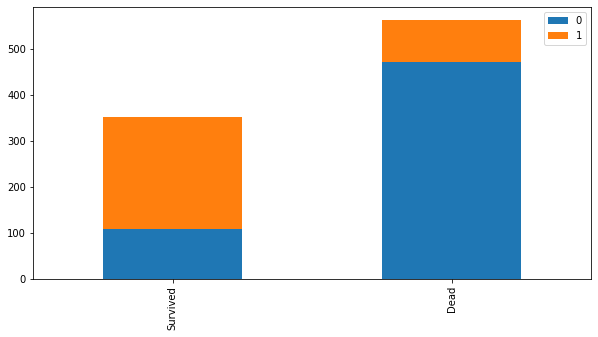

In [411]:
# 피처 : sex
# 1. 생존 여부에 관련이 높음
# 2. 여자일수록 생족할 확률이 더 높음
# 3. 명확히 구분되어진 데이터이므로 텍스트를 숫자로 변환
df = [df_train, df_test]

sex_mapping = {"male": 0, "female": 1}

for df_sex in df:
    df_sex['sex'] = df_sex['sex'].map(sex_mapping)
    
survived_or_dead('sex')

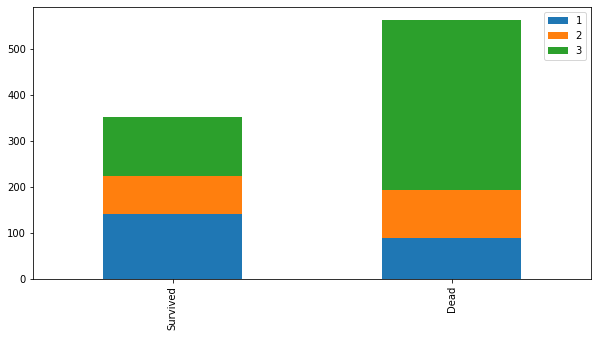

In [412]:
# 피처 : pclass
# 1. 생존 여부에 관련이 높음
# 2. pclass가 3등급 일수록 죽을 확률이 높음, 1등급이 생존할 확률이 높음
# 3. pclass 3이 타이타닉 배에 앞뒤에 있었음, 배가 앞 또는 뒤로 먼저 침몰되었을 가능성이 높음
survived_or_dead('pclass')

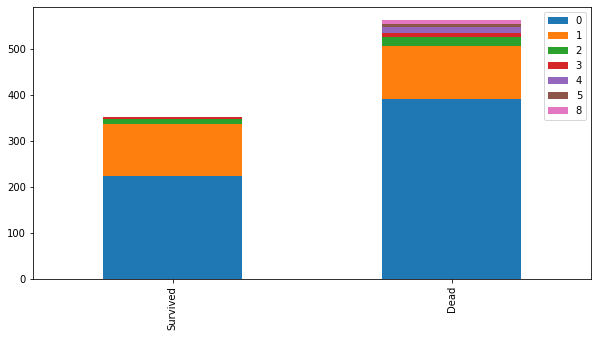

In [413]:
# 피처 : sibsp, parch
# 1. 생존 여부에 관련이 높음
# 2. 혼자일 때보다 형제나 배우자가 있는 경우의 사람들이 생존할 가능성이 더 높음
# -> 위에 예측으로 혼자있을 때 더 생존할 확률이 높다고 생각했지만, 데이터 결과상 오히려 더 죽을 확률이 높았음
survived_or_dead('sibsp')

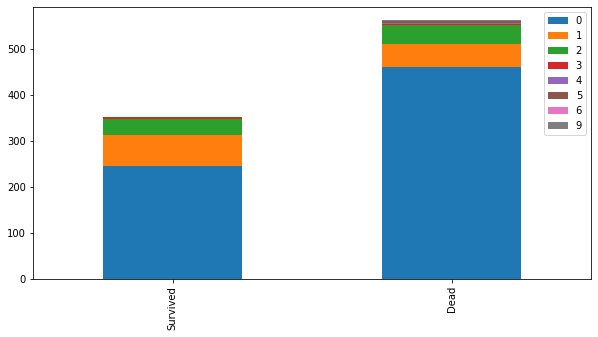

In [414]:
survived_or_dead('parch')

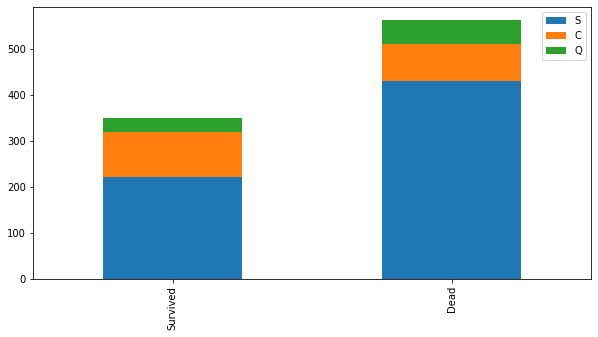

In [415]:
# 피처 : embarked
# 1. 생존 여부에 관련이 많이 없음
# 2. 다른 선착장보다는 C의 탑승자일 경우 생존할 확률이 높지만 생존 여부에 크게 영향을 주는 피처는 아닌 듯 함
survived_or_dead('embarked')

In [416]:
# 피처 엔지니어링 : age, 새로운 피처 : title
# 호칭만 필요하고 이름 피처는 불필요하므로 호칭으로 새피처를 만들고 이름은 삭제
# 1. 생존 여부에 관련이 높음
# 2. 남자일 경우 많이 죽고, 여성은 상대적으로 많이 살았음
# Mr: 0 / Miss: 1 / Mrs: 2 / Others: 3

for df_title in df:
    df_title['title'] = df_title['name'].str.extract('([A-za-z]+)\.', expand=False)

In [417]:
df_train['title'].value_counts()

Mr          523
Miss        185
Mrs         142
Master       40
Dr            8
Rev           6
Col           3
Mlle          2
Ms            1
Dona          1
Mme           1
Lady          1
Sir           1
Jonkheer      1
Countess      1
Name: title, dtype: int64

In [418]:
df_test['title'].value_counts()

Mr        234
Miss       75
Mrs        55
Master     21
Major       2
Rev         2
Ms          1
Capt        1
Col         1
Don         1
Name: title, dtype: int64

In [419]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3,
                 'Lady': 3, 'Capt': 3, 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

for df_title in df:
    df_title['title'] = df_title['title'].map(title_mapping)

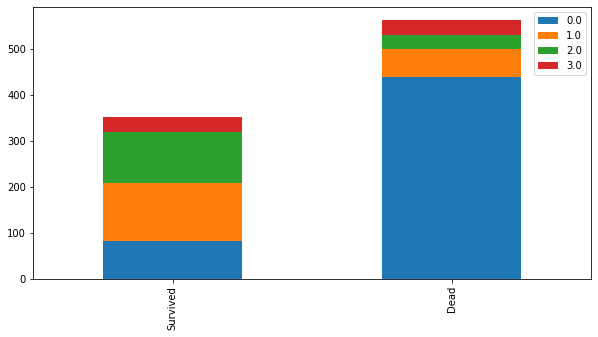

In [420]:
survived_or_dead('title')

In [421]:
df_train = df_train.drop(['name'], axis=1)
df_test = df_test.drop(['name'], axis=1)

In [422]:
df_train

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,2,1,1,13.00,0,1,19.5000,S,1.0
1,2,1,1,4.00,1,1,23.0000,S,1.0
2,2,1,1,30.00,1,0,13.8583,C,1.0
3,3,0,0,NaN,0,0,7.7250,Q,0.0
4,3,1,1,22.00,0,0,7.7250,Q,1.0
...,...,...,...,...,...,...,...,...,...
911,3,1,1,0.17,1,2,20.5750,S,1.0
912,3,0,0,NaN,0,0,8.0500,S,0.0
913,3,1,1,NaN,0,0,7.7333,Q,1.0
914,2,1,1,20.00,0,0,36.7500,S,1.0


In [423]:
# 피처 엔지니어링 : age
# 위에서 구했던 Title에서 남성끼리 평균나이 Mr.끼리 평균나이 Miss끼리 평균나이를 구해서 결측치를 채움
# 10대 중반 정도까지는 생존률이 높고 30대 부근과 70대 근처의 노인분들의 사망률이 높음

In [424]:
df_train.isnull().sum()

pclass        0
survived      0
sex           0
age         175
sibsp         0
parch         0
fare          0
embarked      2
title         1
dtype: int64

In [425]:
df_train.isnull().sum() / len(df_train)

pclass      0.000000
survived    0.000000
sex         0.000000
age         0.191048
sibsp       0.000000
parch       0.000000
fare        0.000000
embarked    0.002183
title       0.001092
dtype: float64

In [426]:
# age 열의 빈값을, 평균값으로 즉시(inplace=True) 채움
df_train['age'].fillna(df_train.groupby('title')['age'].transform('median'), inplace=True)
df_test['age'].fillna(df_test.groupby('title')['age'].transform('median'), inplace=True)

In [427]:
df_train

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,2,1,1,13.00,0,1,19.5000,S,1.0
1,2,1,1,4.00,1,1,23.0000,S,1.0
2,2,1,1,30.00,1,0,13.8583,C,1.0
3,3,0,0,29.00,0,0,7.7250,Q,0.0
4,3,1,1,22.00,0,0,7.7250,Q,1.0
...,...,...,...,...,...,...,...,...,...
911,3,1,1,0.17,1,2,20.5750,S,1.0
912,3,0,0,29.00,0,0,8.0500,S,0.0
913,3,1,1,22.00,0,0,7.7333,Q,1.0
914,2,1,1,20.00,0,0,36.7500,S,1.0


In [428]:
df_train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
title       1
dtype: int64

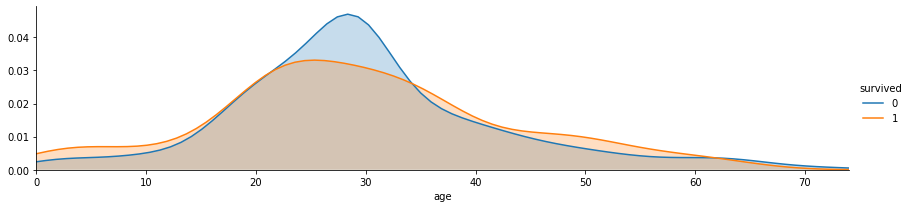

In [429]:
facet = sns.FacetGrid(df_train, hue="survived", aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, df_train['age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

In [430]:
# 피처 엔지니어링 : embarked
# 선박장별로 pclass 수 분석 결과는 Q 선박장은 1등급이 거의 없고, S선박장에서 대부분 사람들이 다 탐
# -> 아래의 embarked 결측치는 S로 함

In [431]:
df_train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
title       1
dtype: int64

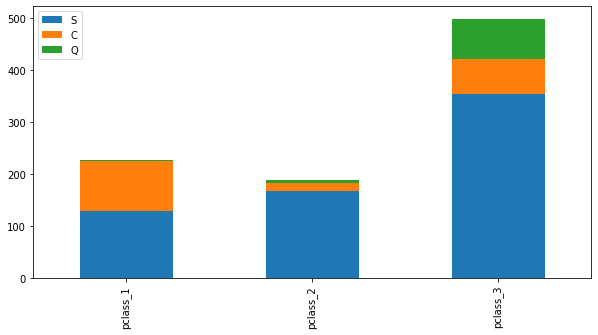

In [432]:
pclass_1 = df_train[df_train['pclass'] == 1]['embarked'].value_counts()
pclass_2 = df_train[df_train['pclass'] == 2]['embarked'].value_counts()
pclass_3 = df_train[df_train['pclass'] == 3]['embarked'].value_counts()

pclass_df = pd.DataFrame([pclass_1, pclass_2, pclass_3], index = ['pclass_1', 'pclass_2', 'pclass_3'])
pclass_df.plot(kind='bar', stacked=True, figsize=(10,5))

In [433]:
df_train['embarked'] = df_train['embarked'].fillna('S')
df_test['embarked'] = df_test['embarked'].fillna('S')

In [434]:
df_train.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
title       1
dtype: int64

In [435]:
df_test.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
title       0
dtype: int64

In [436]:
# 피처 엔지니어링 : sibsp, parch 새로운 피처 : familysize
# 1. 혼자 있을 경우에 죽을 확률이 더 높았고 가족이 한명이라도 있는 경우 살 확률이 높아짐
# 2. familysize라는 본인 + sibsp + parch의 새로운 피처 생성
# -> sibsp, parch 피처 제거
df_train['familysize'] = df_train['sibsp'] + df_train['parch'] + 1
df_test['familysize'] = df_test['sibsp'] + df_test['parch'] + 1

# facet = sns.FacetGrid(df_train, hue="survived", aspect=4)
# facet.map(sns.kdeplot, 'familysize', shade=True)
# facet.set(xlim=(0, df_train['familysize'].max()))
# facet.add_legend()

In [437]:
df_train

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,familysize
0,2,1,1,13.00,0,1,19.5000,S,1.0,2
1,2,1,1,4.00,1,1,23.0000,S,1.0,3
2,2,1,1,30.00,1,0,13.8583,C,1.0,2
3,3,0,0,29.00,0,0,7.7250,Q,0.0,1
4,3,1,1,22.00,0,0,7.7250,Q,1.0,1
...,...,...,...,...,...,...,...,...,...,...
911,3,1,1,0.17,1,2,20.5750,S,1.0,4
912,3,0,0,29.00,0,0,8.0500,S,0.0,1
913,3,1,1,22.00,0,0,7.7333,Q,1.0,1
914,2,1,1,20.00,0,0,36.7500,S,1.0,1


In [438]:
df_train = df_train.drop(['sibsp', 'parch'], axis=1)
df_test = df_test.drop(['sibsp', 'parch'], axis=1)

In [439]:
df_train

,pclass,survived,sex,age,fare,embarked,title,familysize
0,2,1,1,13.00,19.5000,S,1.0,2
1,2,1,1,4.00,23.0000,S,1.0,3
2,2,1,1,30.00,13.8583,C,1.0,2
3,3,0,0,29.00,7.7250,Q,0.0,1
4,3,1,1,22.00,7.7250,Q,1.0,1
...,...,...,...,...,...,...,...,...
911,3,1,1,0.17,20.5750,S,1.0,4
912,3,0,0,29.00,8.0500,S,0.0,1
913,3,1,1,22.00,7.7333,Q,1.0,1
914,2,1,1,20.00,36.7500,S,1.0,1
